MOBILE PRICE PREDICTION

In this Project,on the basis of the mobile Specification like Battery power, 3G enabled , wifi ,Bluetooth, Ram etc we are decidind which of them have more impact on price

In this data:
id:ID
battery_power:Total energy a battery can store in one time measured in mAh
blue:Has bluetooth or not
clock_speed:speed at which microprocessor executes instructions
dual_sim:Has dual sim support or not
fc:Front Camera mega pixels
four_g:Has 4G or not
int_memory:Internal Memory in Gigabytes
m_dep:Mobile Depth in cm
mobile_wt:Weight of mobile phone
n_cores:Number of cores of processor
pc:Primary Camera mega pixels
px_height:Pixel Resolution Height
px_width:Pixel Resolution Width
ram:Random Access Memory in Megabytes
sc_h:Screen Height of mobile in cm
sc_w:Screen Width of mobile in cm
talk_time:longest time that a single battery charge will last when you are
three_g:Has 3G or not
touch_screen:Has touch screen or not
wifi:Has wifi or not
About this Dataset Context Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is

Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import sklearn as skl
import warnings
warnings.filterwarnings("ignore")
plt.ion()

In [2]:
from matplotlib.pyplot import figure 
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LassoCV,RidgeClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression

In [3]:
m_price=pd.read_csv('C:\\Users\\user\\Documents\\Data Driven Technology\\Datasets\\train_mobile.csv')
m_price.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
m_price.iloc[:,:20].columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [5]:
col = m_price.iloc[:,:20].columns
values = m_price.iloc[:,:20].values #returns a numpy array
scaler = MaxAbsScaler()
scaled_1 = scaler.fit_transform(values)
scaled = pd.DataFrame(scaled_1, columns=col)
scaled.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.421421,0.0,0.733333,0.0,0.052632,0.0,0.109375,0.6,0.940,0.250,0.10,0.010204,0.378378,0.637569,0.473684,0.388889,0.95,0.0,0.0,1.0
1,0.511011,1.0,0.166667,1.0,0.000000,1.0,0.828125,0.7,0.680,0.375,0.30,0.461735,0.994995,0.658079,0.894737,0.166667,0.35,1.0,1.0,0.0
2,0.281782,1.0,0.166667,1.0,0.105263,1.0,0.640625,0.9,0.725,0.625,0.30,0.644388,0.858859,0.651076,0.578947,0.111111,0.45,1.0,1.0,0.0
3,0.307808,1.0,0.833333,0.0,0.000000,0.0,0.156250,0.8,0.655,0.750,0.45,0.620408,0.893894,0.692596,0.842105,0.444444,0.55,1.0,0.0,0.0
4,0.911411,1.0,0.400000,0.0,0.684211,1.0,0.687500,0.6,0.705,0.250,0.70,0.616327,0.606607,0.352926,0.421053,0.111111,0.75,1.0,1.0,0.0


In [6]:
scaled['price_range'] = m_price['price_range']


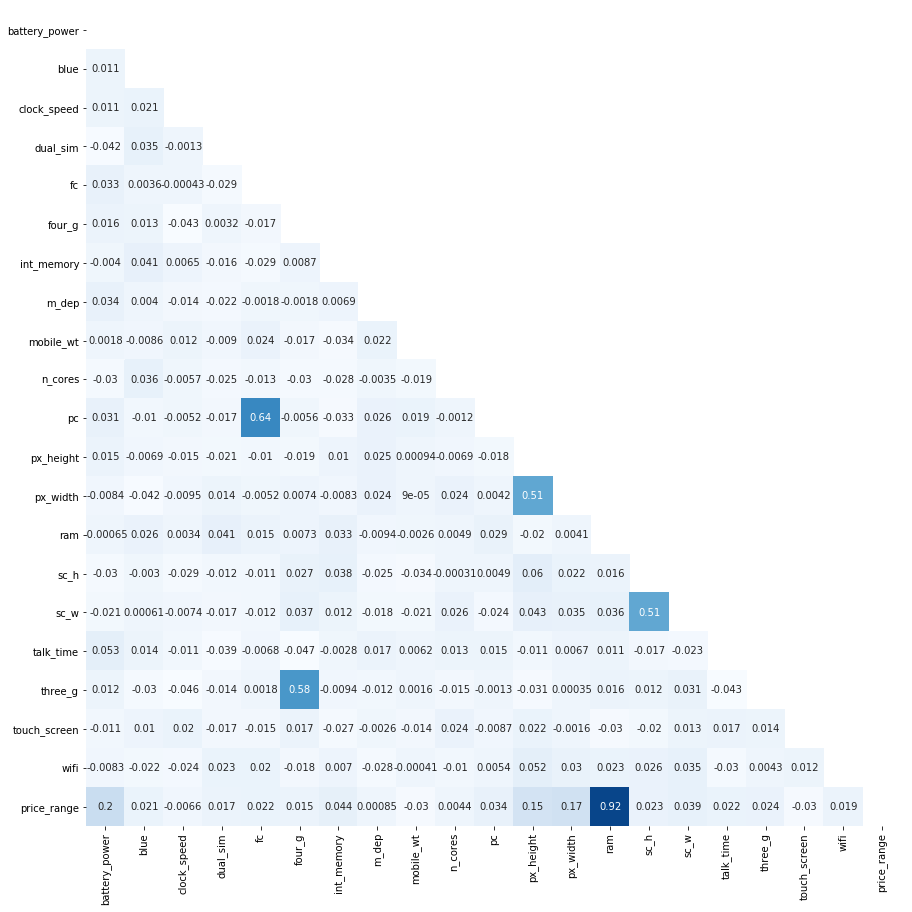

In [7]:
corr_matrix=scaled.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(25,15))
with sns.axes_style("white"):
    sns.heatmap(corr_matrix, mask=mask, square=True, annot=True, cmap=cm.Blues, cbar=False)



#fig1 = plt.gcf()
#plt.figure(figsize=(30,20))
#sns.heatmap(scaled.corr(),annot=True,cmap=cm.Blues)
#plt.draw()

plt.savefig("C:\\Users\\user\\Documents\\Data Driven Technology\\Datasets\\correlation.jpg",frameon=True);

In [8]:
#using best 8 as per corr
#we are not considering the correlations between X features among themselves
corr = scaled.corr()
corr = corr.price_range
corr.sort_values(ascending = False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

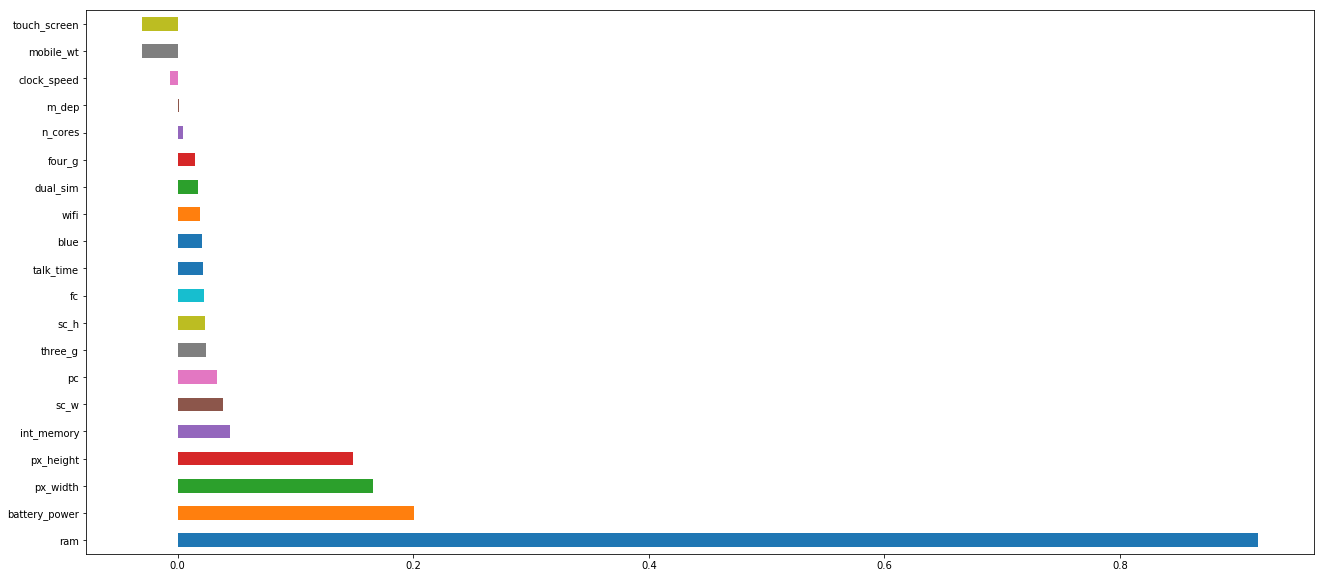

In [9]:
fig = figure(figsize=(22,10))
#sns.barplot(corr.sort_values(ascending = False))
#plt.bar(corr.sort_values(ascending = False),)
#plt.bar(x_bar,y_bar)
#plt.plot(corr.sort_values(ascending = False),marker = 'x',color='darkgreen');
corr.sort_values(ascending = False)[1:].plot(kind='barh');

<Figure size 3600x2160 with 0 Axes>

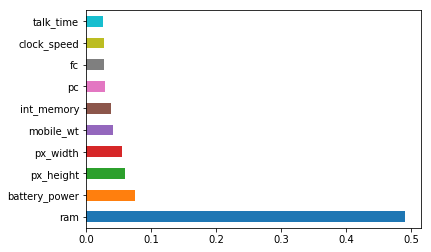

<Figure size 3600x2160 with 0 Axes>

In [10]:
#Finding out best feature using Random Forest Clssifier
X = scaled.drop(['price_range'],axis=1)
y = scaled['price_range']

model1 = RandomForestClassifier()
model1.fit(X , y)

feature_imp1 = pd.Series(model1.feature_importances_ , index = X.columns)
feature_imp1.nlargest(10).plot(kind = 'barh')
figure(num=None, figsize=(50, 30))

<Figure size 3600x2160 with 0 Axes>

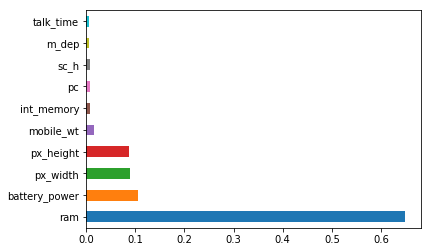

<Figure size 3600x2160 with 0 Axes>

In [11]:
#Checking with Decision Tree 

model = DecisionTreeClassifier(criterion='gini')
model.fit(X , y)

feature_imp = pd.Series(model.feature_importances_ , index = X.columns)
feature_imp.nlargest(10).plot(kind = 'barh')
figure(num=None, figsize=(50, 30))

In [12]:
#Random Forest didnot give a accurate feature selection, therefore using SelectKBest
best_features = SelectKBest(score_func = chi2 , k = 10)
fit = best_features.fit(X , y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)
f_score = pd.concat([df_scores , df_columns], axis = 1)
f_score.columns = ['score' , 'features']
print (f_score.nlargest(20 , 'score'))


         score       features
13  232.933346            ram
11    8.858964      px_height
0     7.072005  battery_power
12    4.910204       px_width
18    1.928429   touch_screen
5     1.521572         four_g
6     1.403736     int_memory
9     1.137194        n_cores
15    0.915573           sc_w
7     0.745820          m_dep
1     0.723232           blue
16    0.661820      talk_time
3     0.631011       dual_sim
4     0.533430             fc
14    0.506046           sc_h
8     0.479864      mobile_wt
10    0.459303             pc
19    0.422091           wifi
17    0.327643        three_g
2     0.216122    clock_speed


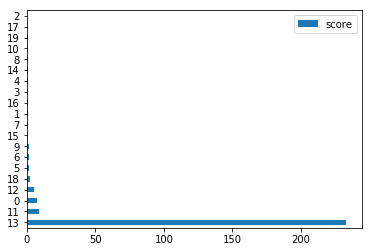

In [13]:
f_score.nlargest(20 , 'score').plot(kind='barh');

In [14]:
scaled_copy = scaled.copy()

In [15]:
#creating a new category to check if this fits within the best 8 features
scaled_copy['categorical'] = (scaled_copy["blue"].astype(bool) + \
                    scaled_copy["dual_sim"].astype(bool) + \
                    scaled_copy["four_g"].astype(bool) + \
                    scaled_copy["three_g"].astype(bool) + \
                    scaled_copy["touch_screen"].astype(bool) + \
                    scaled_copy["wifi"].astype(bool))


In [16]:
scaled_copy = scaled_copy[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'categorical','price_range' ]]
scaled_copy.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,categorical,price_range
0,0.421421,0.0,0.733333,0.0,0.052632,0.0,0.109375,0.6,0.940,0.250,...,0.378378,0.637569,0.473684,0.388889,0.95,0.0,0.0,1.0,True,1
1,0.511011,1.0,0.166667,1.0,0.000000,1.0,0.828125,0.7,0.680,0.375,...,0.994995,0.658079,0.894737,0.166667,0.35,1.0,1.0,0.0,True,2
2,0.281782,1.0,0.166667,1.0,0.105263,1.0,0.640625,0.9,0.725,0.625,...,0.858859,0.651076,0.578947,0.111111,0.45,1.0,1.0,0.0,True,2
3,0.307808,1.0,0.833333,0.0,0.000000,0.0,0.156250,0.8,0.655,0.750,...,0.893894,0.692596,0.842105,0.444444,0.55,1.0,0.0,0.0,True,2
4,0.911411,1.0,0.400000,0.0,0.684211,1.0,0.687500,0.6,0.705,0.250,...,0.606607,0.352926,0.421053,0.111111,0.75,1.0,1.0,0.0,True,1


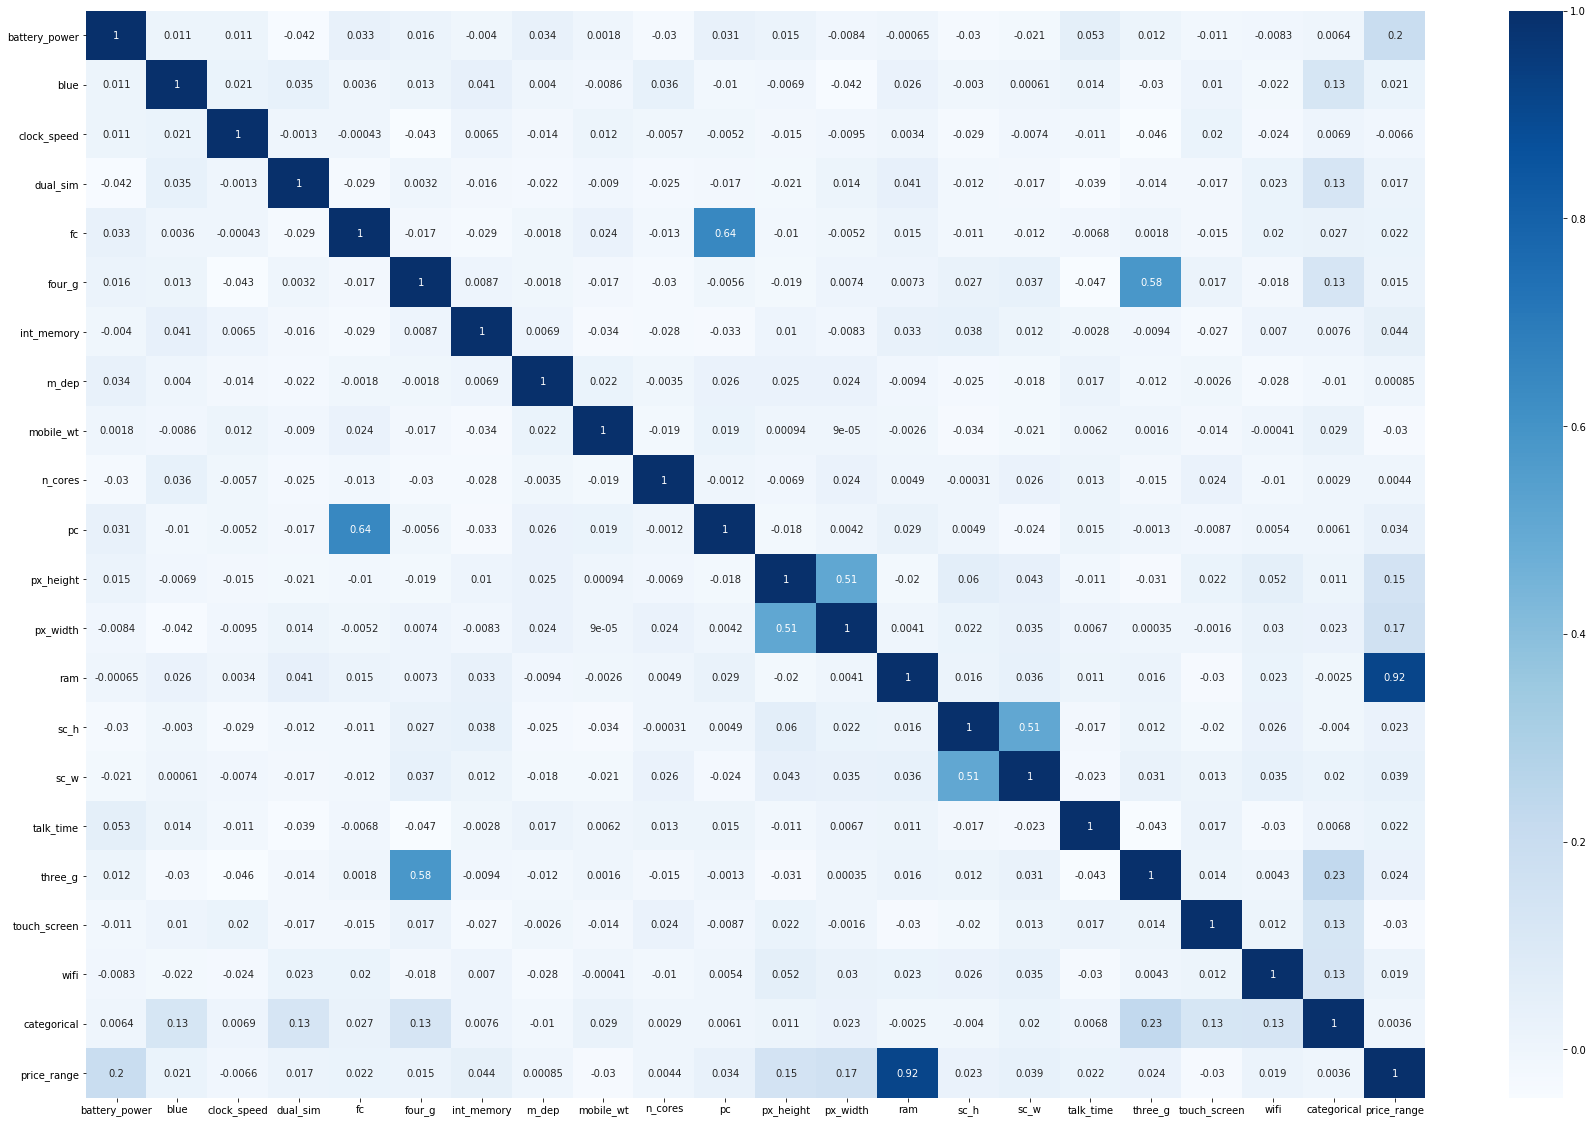

In [17]:
plt.figure(figsize=(30,20))
sns.heatmap(scaled_copy.corr(),annot=True,cmap=cm.Blues);
#we see that categorical doesn't make much sense

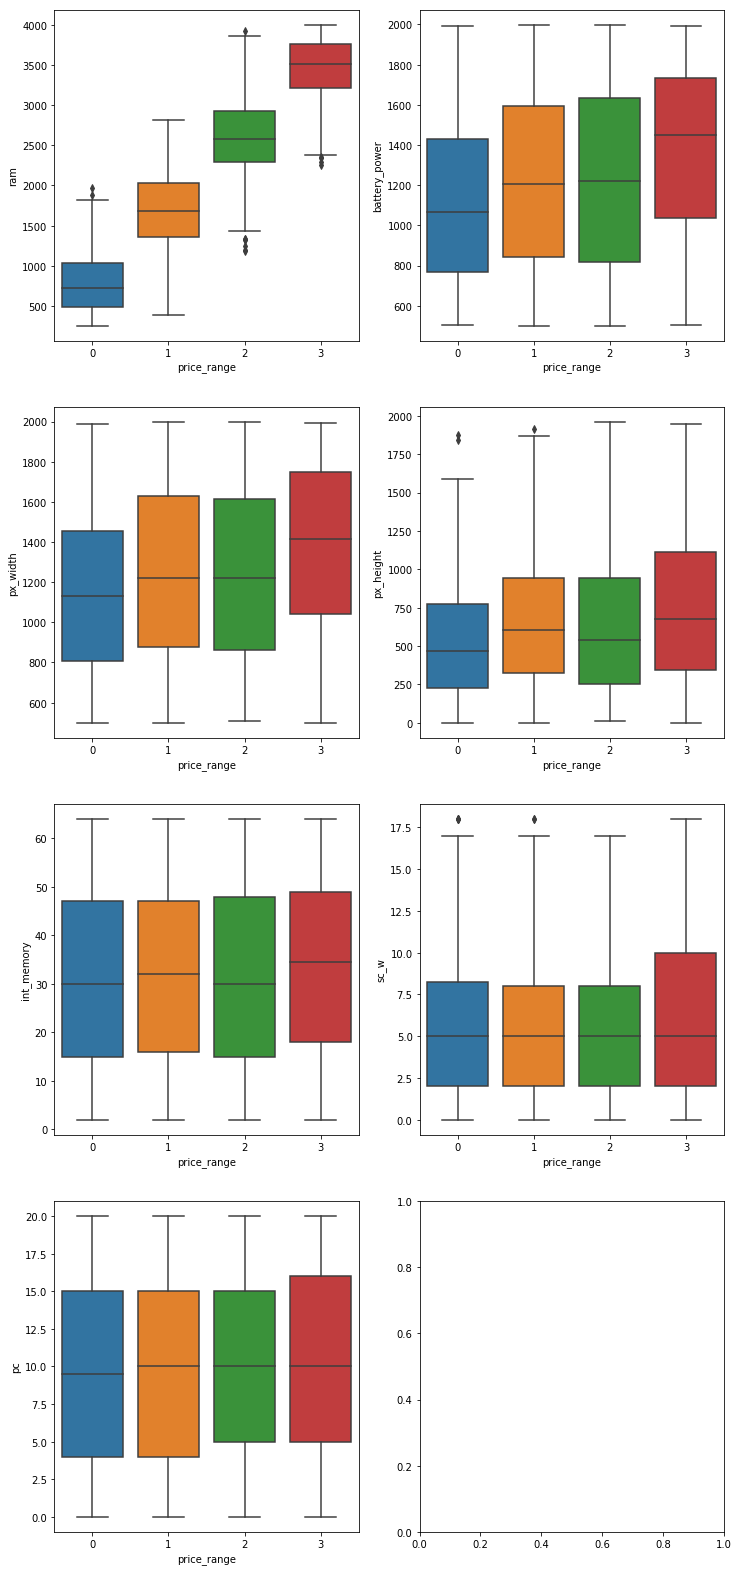

In [18]:
#so we donot use scaled_copy anymore

#EDA for the 8 features that we saw on Random Forest
fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(12,28))

sns.boxplot(x='price_range',y='ram',data=m_price,ax=ax[0,0]);
sns.boxplot(x='price_range',y='battery_power',data=m_price,ax=ax[0,1]);
sns.boxplot(x='price_range',y='px_width',data=m_price,ax=ax[1,0]);
sns.boxplot(x='price_range',y='px_height',data=m_price,ax=ax[1,1]);
sns.boxplot(x='price_range',y='int_memory',data=m_price,ax=ax[2,0]);
sns.boxplot(x='price_range',y='sc_w',data=m_price,ax=ax[2,1]);
sns.boxplot(x='price_range',y='pc',data=m_price,ax=ax[3,0]);

#Boxplot gives us a distribution

#sns.boxplot(x='price_range',y='mobile_wt',data=scaled,ax=ax[2,1]);
#sns.boxplot(x='price_range',y='talk_time',data=scaled,ax=ax[3,0]);
#sns.boxplot(x='price_range',y='m_dep',data=scaled,ax=ax[4,1]);
#sns.boxplot(x='price_range',y='sc_h',data=scaled,ax=ax[5,0]);
#sns.boxplot(x='price_range',y='fc',data=scaled,ax=ax[5,1]);


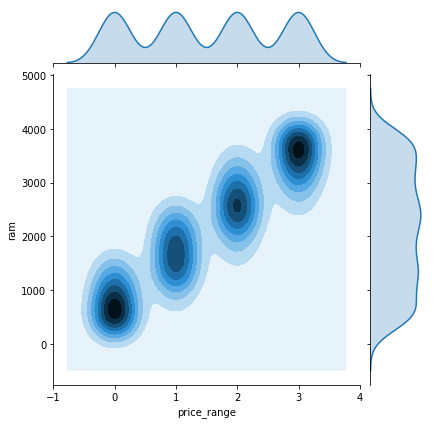

In [19]:
#We check for the same 7 features with jointplot to see the distribution concentration per price range

sns.jointplot(x='price_range',y= 'ram',data=m_price, kind='kde');

#sns.boxplot(x='price_range',y='',data=m_price,ax=ax[2,1]);
#sns.boxplot(x='price_range',y='',data=m_price,ax=ax[3,0]);

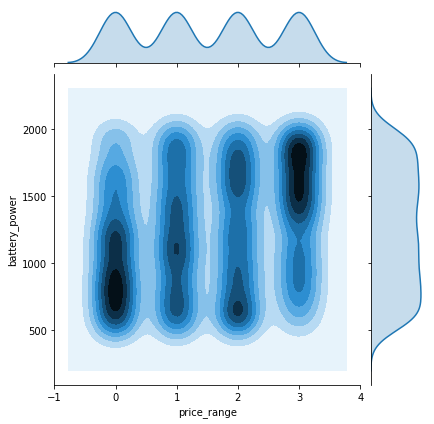

In [20]:
sns.jointplot(x='price_range',y='battery_power',data=m_price,kind='kde')

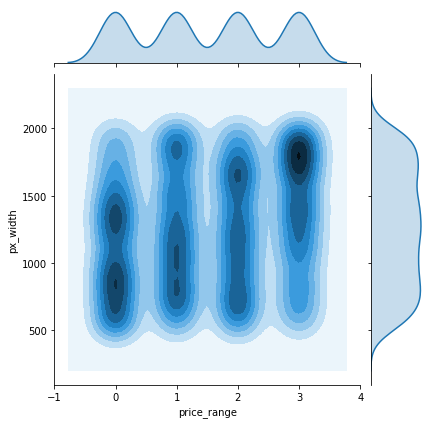

In [21]:
sns.jointplot(x='price_range',y='px_width',data=m_price,kind='kde');

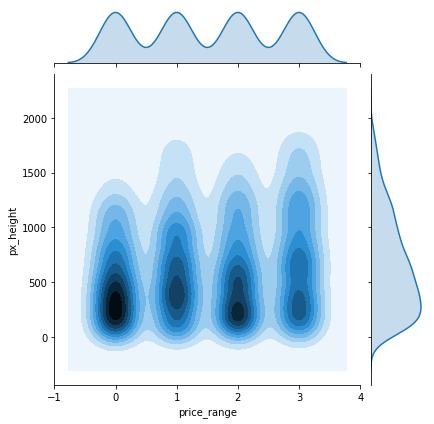

In [22]:
sns.jointplot(x='price_range',y='px_height',data=m_price,kind='kde');

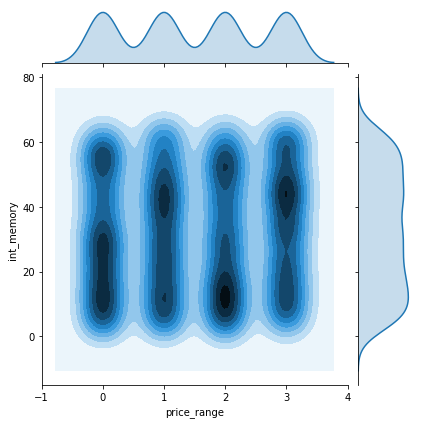

In [23]:
sns.jointplot(x='price_range',y='int_memory',data=m_price,kind='kde');

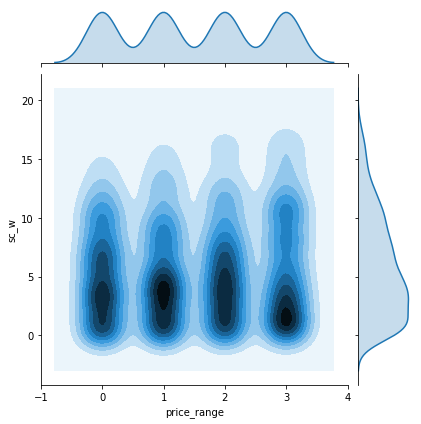

In [24]:
sns.jointplot(x='price_range',y='sc_w',data=m_price,kind='kde');

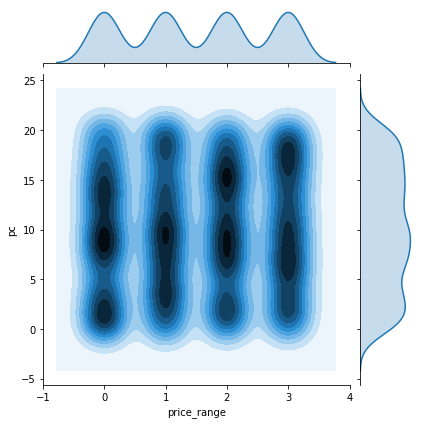

In [25]:
sns.jointplot(x='price_range',y='pc',data=m_price,kind='kde');

In [26]:
#Now we try creating different band groups for the top 7 features that we found through correlation matrix to check the percent distribution of price_range 
m_price_copy = m_price.copy()


In [27]:
pd.cut(m_price_copy.ram,5).unique()

[(2501.2, 3249.6], (1004.4, 1752.8], (252.258, 1004.4], (3249.6, 3998.0], (1752.8, 2501.2]]
Categories (5, interval[float64]): [(252.258, 1004.4] < (1004.4, 1752.8] < (1752.8, 2501.2] < (2501.2, 3249.6] < (3249.6, 3998.0]]

In [28]:
#we get the ranges as above and now we proceed to create bands for the other 6 features
pd.cut(m_price_copy.px_height,5).unique()
pd.cut(m_price_copy.battery_power,5).unique()
pd.cut(m_price_copy.px_width,5).unique()
pd.cut(m_price_copy.int_memory,5).unique()
pd.cut(m_price_copy.sc_w,5).unique()
pd.cut(m_price_copy.pc,5).unique()
#ram
m_price_copy.loc[m_price_copy['ram'] <= 1004.4, 'ram'] = 0
m_price_copy.loc[(m_price_copy['ram'] > 1004.4) & (m_price_copy['ram'] <= 1752.8), 'ram'] = 1
m_price_copy.loc[(m_price_copy['ram'] > 1752.8) & (m_price_copy['ram'] <= 2501.2), 'ram'] = 2
m_price_copy.loc[(m_price_copy['ram'] > 2501.2) & (m_price_copy['ram'] <= 3249.6), 'ram'] = 3
m_price_copy.loc[m_price_copy['ram'] > 3249.6 , 'ram'] = 4

#pixel_height
m_price_copy.loc[m_price_copy['px_height'] <= 392.0, 'px_height'] = 0
m_price_copy.loc[(m_price_copy['px_height'] > 392.0) & (m_price_copy['px_height'] <= 784.0), 'px_height'] = 1
m_price_copy.loc[(m_price_copy['px_height'] > 784.0) & (m_price_copy['px_height'] <= 1176.0), 'px_height']   = 2
m_price_copy.loc[(m_price_copy['px_height'] > 1176.0) & (m_price_copy['px_height'] <= 1568.0), 'px_height'] = 3
m_price_copy.loc[m_price_copy['px_height'] > 1568.0 , 'px_height'] = 4

#battery_power
m_price_copy.loc[m_price_copy['battery_power'] <= 800.4, 'battery_power'] = 0
m_price_copy.loc[(m_price_copy['battery_power'] > 800.4) & (m_price_copy['battery_power'] <= 1099.8), 'battery_power'] = 1
m_price_copy.loc[(m_price_copy['battery_power'] > 1099.8) & (m_price_copy['battery_power'] <= 1399.2), 'battery_power']   = 2
m_price_copy.loc[(m_price_copy['battery_power'] > 1399.2) & (m_price_copy['battery_power'] <= 1698.6), 'battery_power'] = 3
m_price_copy.loc[m_price_copy['battery_power'] > 1698.6 , 'battery_power'] = 4

#pixel_width
m_price_copy.loc[m_price_copy['px_width'] <= 799.6, 'px_width'] = 0
m_price_copy.loc[(m_price_copy['px_width'] > 799.6) & (m_price_copy['px_width'] <= 1099.2), 'px_width'] = 1
m_price_copy.loc[(m_price_copy['px_width'] > 1099.2) & (m_price_copy['px_width'] <= 1398.8), 'px_width']   = 2
m_price_copy.loc[(m_price_copy['px_width'] > 1398.8) & (m_price_copy['px_width'] <= 1698.4), 'px_width'] = 3
m_price_copy.loc[m_price_copy['px_width'] > 1698.4 , 'px_width'] = 4

#internal_memory
m_price_copy.loc[m_price_copy['int_memory'] <= 14.4, 'int_memory'] = 0
m_price_copy.loc[(m_price_copy['int_memory'] > 14.4) & (m_price_copy['int_memory'] <= 26.8), 'int_memory'] = 1
m_price_copy.loc[(m_price_copy['int_memory'] > 26.8) & (m_price_copy['int_memory'] <= 39.2), 'int_memory']   = 2
m_price_copy.loc[(m_price_copy['int_memory'] > 39.2) & (m_price_copy['int_memory'] <= 51.6), 'int_memory'] = 3
m_price_copy.loc[m_price_copy['int_memory'] > 51.6 , 'int_memory'] = 4

#screen_width
m_price_copy.loc[m_price_copy['sc_w'] <= 3.6, 'sc_w'] = 0
m_price_copy.loc[(m_price_copy['sc_w'] > 3.6) & (m_price_copy['sc_w'] <= 7.2), 'sc_w'] = 1
m_price_copy.loc[(m_price_copy['sc_w'] > 7.2) & (m_price_copy['sc_w'] <= 10.8), 'sc_w']   = 2
m_price_copy.loc[(m_price_copy['sc_w'] > 10.8) & (m_price_copy['sc_w'] <= 14.4), 'sc_w'] = 3
m_price_copy.loc[m_price_copy['sc_w'] > 14.4 , 'sc_w'] = 4

#primary_camera
m_price_copy.loc[m_price_copy['pc'] <= 4.0, 'pc'] = 0
m_price_copy.loc[(m_price_copy['pc'] > 4.0) & (m_price_copy['pc'] <= 8.0), 'pc'] = 1
m_price_copy.loc[(m_price_copy['pc'] > 8.0) & (m_price_copy['pc'] <= 12.0), 'pc']   = 2
m_price_copy.loc[(m_price_copy['pc'] > 12.0) & (m_price_copy['pc'] <= 16.0), 'pc'] = 3
m_price_copy.loc[m_price_copy['pc'] > 16.0 , 'pc'] = 4

In [29]:
(m_price_copy[m_price_copy.price_range == 0].ram.value_counts() * 100)/(m_price_copy[m_price_copy.price_range == 0]).ram.count()
#from the data we can see: in price_range -> 0, 73% of the mobile handsets have Ram memory in range 0 which is less than 1000.4 MB
#likewise we see the distribution through a countplot for other price ranges

0    73.0
1    26.4
2     0.6
Name: ram, dtype: float64

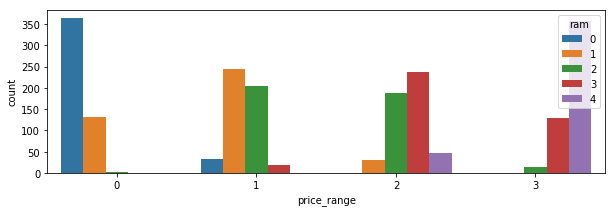

In [30]:
fig, ax = plt.subplots(figsize=(10,3))
sns.countplot(data=m_price_copy,x='price_range',hue='ram')

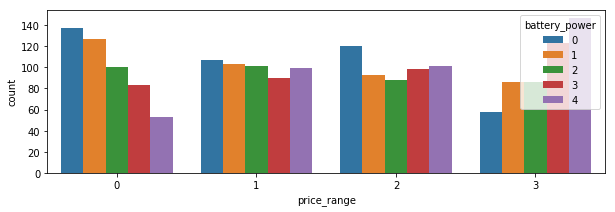

In [31]:
fig, ax = plt.subplots(figsize=(10,3))
sns.countplot(data=m_price_copy,x='price_range',hue='battery_power');

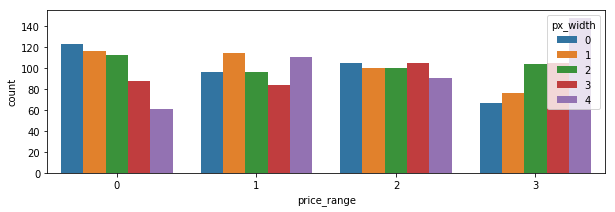

In [32]:
fig, ax = plt.subplots(figsize=(10,3))
sns.countplot(data=m_price_copy,x='price_range',hue='px_width');

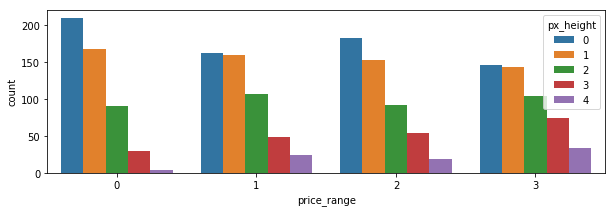

In [33]:
fig, ax = plt.subplots(figsize=(10,3))
sns.countplot(data=m_price_copy,x='price_range',hue='px_height');

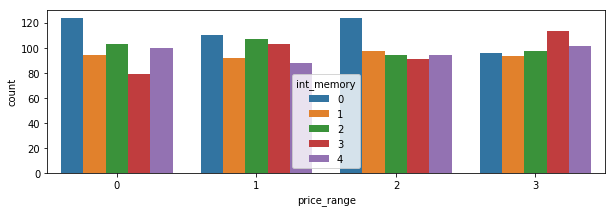

In [34]:
fig, ax = plt.subplots(figsize=(10,3))
sns.countplot(data=m_price_copy,x='price_range',hue='int_memory');

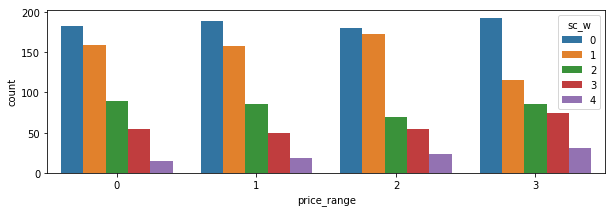

In [35]:
fig, ax = plt.subplots(figsize=(10,3))
sns.countplot(data=m_price_copy,x='price_range',hue='sc_w');

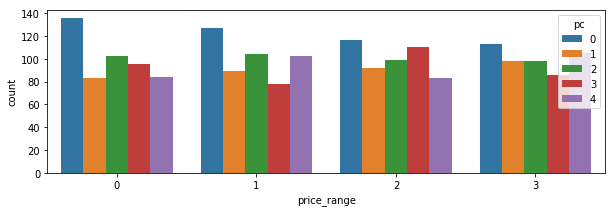

In [36]:
fig, ax = plt.subplots(figsize=(10,3))
sns.countplot(data=m_price_copy,x='price_range',hue='pc');

In [37]:
#Finding the mean values per price range and features - so as to have the mean of the handsets per price_range and per feature_range
m_price_copy['ram_actual'] = m_price.ram
m_price_copy['battery_power_actual'] = m_price.battery_power
m_price_copy['px_width_actual'] = m_price.px_width
m_price_copy['px_height_actual'] = m_price.px_height
m_price_copy['int_memory_actual'] = m_price.int_memory
m_price_copy['sc_w_actual'] = m_price.sc_w
m_price_copy['pc_actual'] = m_price.pc

In [38]:
m_price_copy[['ram','ram_actual','price_range']].head()

,ram,ram_actual,price_range
0,3,2549,1
1,3,2631,2
2,3,2603,2
3,3,2769,2
4,1,1411,1


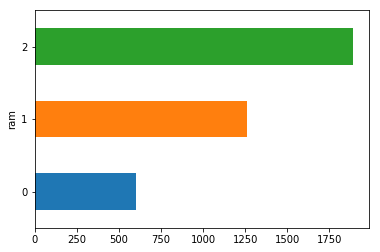

In [39]:
m_price_copy[(m_price_copy.price_range == 0)].groupby('ram').ram_actual.mean().plot(kind='barh')

In [40]:
m_price_copy.groupby(['price_range','ram']).ram_actual.mean()

price_range  ram
0            0       604.635616
             1      1259.757576
             2      1892.333333
1            0       758.848485
             1      1416.827869
             2      2058.551220
             3      2610.777778
2            1      1555.000000
             2      2232.941176
             3      2814.555085
             4      3467.297872
3            2      2403.384615
             3      2992.240310
             4      3651.879888
Name: ram_actual, dtype: float64

In [41]:
m_price_copy.groupby(['price_range','battery_power']).battery_power_actual.mean()

price_range  battery_power
0            0                 645.605839
             1                 941.826772
             2                1232.900000
             3                1548.108434
             4                1860.528302
1            0                 639.420561
             1                 956.553398
             2                1242.930693
             3                1538.033333
             4                1853.858586
2            0                 639.475000
             1                 946.935484
             2                1245.352273
             3                1561.663265
             4                1848.752475
3            0                 666.672414
             1                 944.476744
             2                1265.686047
             3                1543.056911
             4                1846.632653
Name: battery_power_actual, dtype: float64

In [42]:
m_price_copy.groupby(['price_range','px_width']).px_width_actual.mean()

price_range  px_width
0            0            639.642276
             1            932.827586
             2           1257.517857
             3           1528.909091
             4           1850.245902
1            0            665.354167
             1            955.701754
             2           1248.208333
             3           1534.392857
             4           1858.300000
2            0            653.552381
             1            948.090000
             2           1244.590000
             3           1558.095238
             4           1839.244444
3            0            655.029851
             1            951.223684
             2           1259.423077
             3           1559.390476
             4           1851.506757
Name: px_width_actual, dtype: float64

In [43]:
m_price_copy.groupby(['price_range','px_height']).px_height_actual.mean()

price_range  px_height
0            0             199.242857
             1             567.748503
             2             967.411111
             3            1296.379310
             4            1721.750000
1            0             210.697531
             1             578.675000
             2             962.433962
             3            1331.666667
             4            1699.458333
2            0             198.459016
             1             570.500000
             2             968.304348
             3            1323.018519
             4            1714.789474
3            0             203.493151
             1             587.874126
             2             982.125000
             3            1347.527027
             4            1720.909091
Name: px_height_actual, dtype: float64

In [44]:
m_price_copy.groupby(['price_range','int_memory']).int_memory_actual.mean()

price_range  int_memory
0            0              8.387097
             1             20.808511
             2             32.174757
             3             45.227848
             4             57.040000
1            0              8.036364
             1             20.304348
             2             32.822430
             3             45.281553
             4             58.295455
2            0              7.935484
             1             19.628866
             2             32.319149
             3             45.659341
             4             57.223404
3            0              8.572917
             1             20.494624
             2             33.247423
             3             45.318584
             4             58.544554
Name: int_memory_actual, dtype: float64

In [45]:
m_price_copy.groupby(['price_range','sc_w']).sc_w_actual.mean()

price_range  sc_w
0            0        1.502732
             1        5.452830
             2        9.022472
             3       12.074074
             4       16.266667
1            0        1.492063
             1        5.196203
             2        8.952941
             3       12.460000
             4       15.833333
2            0        1.505556
             1        5.441860
             2        8.857143
             3       12.036364
             4       16.000000
3            0        1.507772
             1        5.284483
             2        8.929412
             3       12.026667
             4       16.096774
Name: sc_w_actual, dtype: float64

In [46]:
m_price_copy.groupby(['price_range','pc']).pc_actual.mean()

price_range  pc
0            0      1.794118
             1      6.855422
             2     10.343137
             3     14.347368
             4     18.523810
1            0      2.141732
             1      6.606742
             2     10.384615
             3     14.346154
             4     18.656863
2            0      1.905172
             1      6.695652
             2     10.323232
             3     14.645455
             4     18.542169
3            0      1.982301
             1      6.500000
             2     10.408163
             3     14.604651
             4     18.457143
Name: pc_actual, dtype: float64

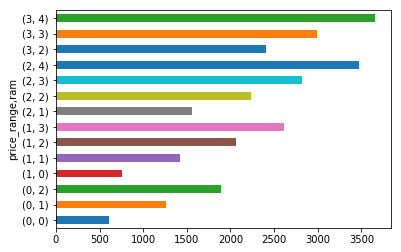

In [47]:
m_price_copy.groupby(['price_range','ram']).ram_actual.mean().plot(kind='barh');

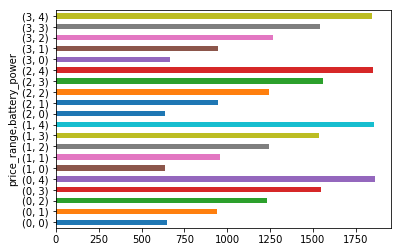

In [48]:
m_price_copy.groupby(['price_range','battery_power']).battery_power_actual.mean().plot(kind='barh');

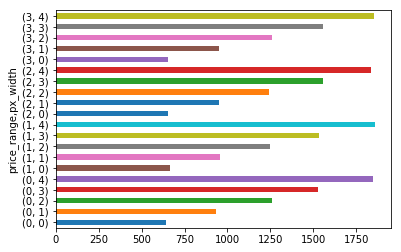

In [49]:
m_price_copy.groupby(['price_range','px_width']).px_width_actual.mean().plot(kind='barh');

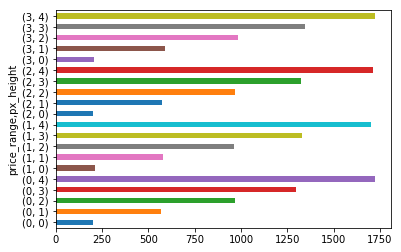

In [50]:
m_price_copy.groupby(['price_range','px_height']).px_height_actual.mean().plot(kind='barh');

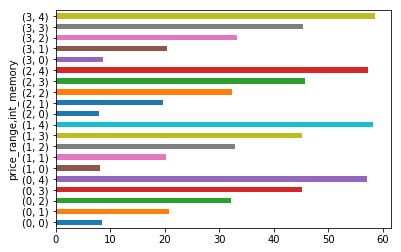

In [51]:
m_price_copy.groupby(['price_range','int_memory']).int_memory_actual.mean().plot(kind='barh');

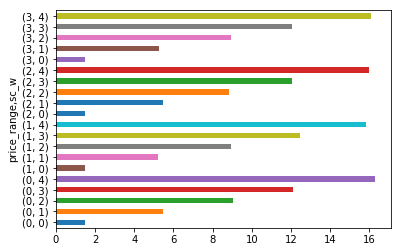

In [52]:
m_price_copy.groupby(['price_range','sc_w']).sc_w_actual.mean().plot(kind='barh');

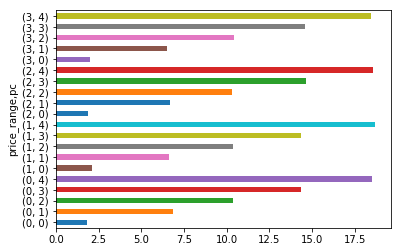

In [53]:
m_price_copy.groupby(['price_range','pc']).pc_actual.mean().plot(kind='barh');

In [54]:
scaled.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0.421421,0.0,0.733333,0.0,0.052632,0.0,0.109375,0.6,0.940,0.250,...,0.010204,0.378378,0.637569,0.473684,0.388889,0.95,0.0,0.0,1.0,1
1,0.511011,1.0,0.166667,1.0,0.000000,1.0,0.828125,0.7,0.680,0.375,...,0.461735,0.994995,0.658079,0.894737,0.166667,0.35,1.0,1.0,0.0,2
2,0.281782,1.0,0.166667,1.0,0.105263,1.0,0.640625,0.9,0.725,0.625,...,0.644388,0.858859,0.651076,0.578947,0.111111,0.45,1.0,1.0,0.0,2
3,0.307808,1.0,0.833333,0.0,0.000000,0.0,0.156250,0.8,0.655,0.750,...,0.620408,0.893894,0.692596,0.842105,0.444444,0.55,1.0,0.0,0.0,2
4,0.911411,1.0,0.400000,0.0,0.684211,1.0,0.687500,0.6,0.705,0.250,...,0.616327,0.606607,0.352926,0.421053,0.111111,0.75,1.0,1.0,0.0,1


In [55]:
scaled_copy.dtypes

battery_power    float64
blue             float64
clock_speed      float64
dual_sim         float64
fc               float64
four_g           float64
int_memory       float64
m_dep            float64
mobile_wt        float64
n_cores          float64
pc               float64
px_height        float64
px_width         float64
ram              float64
sc_h             float64
sc_w             float64
talk_time        float64
three_g          float64
touch_screen     float64
wifi             float64
categorical         bool
price_range        int64
dtype: object

In [56]:
scaled_copy.categorical = scaled_copy.categorical.astype(bool)

In [57]:
scaled_copy.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,categorical,price_range
0,0.421421,0.0,0.733333,0.0,0.052632,0.0,0.109375,0.6,0.940,0.250,...,0.378378,0.637569,0.473684,0.388889,0.95,0.0,0.0,1.0,True,1
1,0.511011,1.0,0.166667,1.0,0.000000,1.0,0.828125,0.7,0.680,0.375,...,0.994995,0.658079,0.894737,0.166667,0.35,1.0,1.0,0.0,True,2
2,0.281782,1.0,0.166667,1.0,0.105263,1.0,0.640625,0.9,0.725,0.625,...,0.858859,0.651076,0.578947,0.111111,0.45,1.0,1.0,0.0,True,2
3,0.307808,1.0,0.833333,0.0,0.000000,0.0,0.156250,0.8,0.655,0.750,...,0.893894,0.692596,0.842105,0.444444,0.55,1.0,0.0,0.0,True,2
4,0.911411,1.0,0.400000,0.0,0.684211,1.0,0.687500,0.6,0.705,0.250,...,0.606607,0.352926,0.421053,0.111111,0.75,1.0,1.0,0.0,True,1


In [58]:
scaled_copy.categorical.unique()

array([ True, False])

In [59]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X1=ss.fit_transform(X=X) #scaling the features matrix

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X1,y,test_size=0.3)
model = LogisticRegression()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))

Train Set Accuracy:84.92857142857143
Test Set Accuracy:82.0


In [61]:
#SVC model with only the important features got more accuracy
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
#SVC classifier
model = SVC()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))

Train Set Accuracy:98.78571428571429
Test Set Accuracy:87.16666666666667

Confusion Matrix:
[[126   9   0   0]
 [ 10 127  16   0]
 [  0  20 137  13]
 [  0   0   9 133]]


In [62]:
#Decision Tree Classifier classifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))

#As it is Seen,Decision tree overfits the data, resulting in pretty low test accuracy

Train Set Accuracy:100.0
Test Set Accuracy:80.33333333333333

Confusion Matrix:
[[122  20   0   0]
 [ 14 121  25   0]
 [  0  15 114  21]
 [  0   0  23 125]]


In [63]:
from sklearn.ensemble import GradientBoostingClassifier
#Gradient Boosting Classifier classifier
model = GradientBoostingClassifier()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))

#Boosting Slightly reduces overfitting, but still a bad model

Train Set Accuracy:100.0
Test Set Accuracy:89.33333333333333

Confusion Matrix:
[[131   7   0   0]
 [  5 137  13   0]
 [  0  12 137  15]
 [  0   0  12 131]]


In [64]:
#Random Forest Classifier
param_grid={"criterion":['gini','entropy'],"n_estimators":[8,10,12]}
model = RandomForestClassifier()
model1 = GridSearchCV(model,n_jobs=-1,param_grid=param_grid)
model1.fit(X_train,y_train)
y_train_pred = model1.predict(X_train)
y_test_pred = model1.predict(X_test)


print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))

Train Set Accuracy:100.0
Test Set Accuracy:82.83333333333334

Confusion Matrix:
[[124  11   0   0]
 [ 12 124  22   0]
 [  0  21 121  18]
 [  0   0  19 128]]


In [65]:
scaled.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [66]:
X_new = scaled[['ram','battery_power','px_width','px_height','int_memory','sc_w','pc']].values#,'touch_screen','mobile_wt']].values
y_new = scaled['price_range'].values
X1=ss.fit_transform(X=X_new)
X_train,X_test,y_train,y_test = train_test_split(X1,y,test_size=0.3)

In [67]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))

Train Set Accuracy:83.85714285714285
Test Set Accuracy:80.66666666666666


In [68]:
model = SVC()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print(classification_report(y_test,y_test_pred))

Train Set Accuracy:97.07142857142857
Test Set Accuracy:89.16666666666667

Confusion Matrix:
[[137  15   0   0]
 [  5 138  16   0]
 [  0   8 131  11]
 [  0   0  10 129]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       142
           1       0.87      0.86      0.86       161
           2       0.87      0.83      0.85       157
           3       0.93      0.92      0.92       140

   micro avg       0.89      0.89      0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600



In [69]:
#Decision Tree Classifier classifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))

#As it is Seen,Decision tree overfits the data, resulting in pretty low test accuracy

Train Set Accuracy:100.0
Test Set Accuracy:84.66666666666667

Confusion Matrix:
[[130  15   0   0]
 [ 12 137  22   0]
 [  0   9 120  19]
 [  0   0  15 121]]


In [70]:
param_grid={"criterion":['gini','entropy'],"n_estimators":[1,5,10,20]}
model = RandomForestClassifier()
model1 = GridSearchCV(model,n_jobs=-1,param_grid=param_grid)
model1.fit(X_train,y_train)
y_train_pred = model1.predict(X_train)
y_test_pred = model1.predict(X_test)


print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))

Train Set Accuracy:100.0
Test Set Accuracy:88.16666666666667

Confusion Matrix:
[[133  14   0   0]
 [  9 142  21   0]
 [  0   5 123   9]
 [  0   0  13 131]]


In [71]:
#Gradient Boosting Classifier classifier
model = GradientBoostingClassifier()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))

Train Set Accuracy:100.0
Test Set Accuracy:89.0

Confusion Matrix:
[[134  11   0   0]
 [  8 146  15   0]
 [  0   4 130  16]
 [  0   0  12 124]]


In [72]:
#Trying KNN
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [73]:
n = range(1,55)
w = ["uniform", "distance"]
a=["ball_tree", "kd_tree", "brute"]
p=[1,2]

pg = dict(n_neighbors=n, weights=w, algorithm=a, p=p)
pg

{'n_neighbors': range(1, 55),
 'weights': ['uniform', 'distance'],
 'algorithm': ['ball_tree', 'kd_tree', 'brute'],
 'p': [1, 2]}

In [74]:
clf=GridSearchCV(kn, param_grid=pg, cv=5, scoring="accuracy")
clf

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(1, 55), 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [75]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(1, 55), 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [76]:
print(clf.best_score_)
print(clf.best_params_)

0.8535714285714285
{'algorithm': 'ball_tree', 'n_neighbors': 37, 'p': 1, 'weights': 'distance'}


In [77]:
kn_best = KNeighborsClassifier(algorithm= 'ball_tree', n_neighbors= 31, p= 1, weights= 'distance')

In [78]:
kn_best.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=31, p=1,
           weights='distance')

In [79]:
predictions=kn_best.predict(X_test)
train_pred = kn_best.predict(X_train)


print("Train Set Accuracy:"+str(accuracy_score(train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(predictions,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(predictions,y_test))
print(classification_report(y_test,predictions))

Train Set Accuracy:100.0
Test Set Accuracy:83.66666666666667

Confusion Matrix:
[[135  21   0   0]
 [  7 124  19   0]
 [  0  16 121  18]
 [  0   0  17 122]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       142
           1       0.83      0.77      0.80       161
           2       0.78      0.77      0.78       157
           3       0.88      0.87      0.87       140

   micro avg       0.84      0.84      0.84       600
   macro avg       0.84      0.84      0.84       600
weighted avg       0.84      0.84      0.84       600



In [80]:
#SVC is getting the best prediction when data is picked from corr as Decision Tree and Random Forest are getting over fitted

In [81]:
scaled.to_excel('C:\\Users\\user\\Documents\\Data Driven Technology\\Datasets\\pricing.xlsx')

In [82]:
m_price.to_excel('C:\\Users\\user\\Documents\\Data Driven Technology\\Datasets\\pricing_original.xlsx')

In [83]:
#the dataframe for tableau
m_price_copy.to_excel('C:\\Users\\user\\Documents\\Data Driven Technology\\Datasets\\pricing_tableau.xlsx')

**Some more observations:**
-No outliers found
-No missing values
-Price target is perfectly balanced
-Strange observations: mobile depth < 0.1cm , Pixel height < 10 , Screen width > 15 cm and < 1cm
-The Ram correlation of 0.92 might be an outlier. Could have checked without taking this and the other features.